# Pymaceuticals Inc.
___________________________________________________________________________________________

# Analysis

#### •	From the bar graph we can see that Capomulin has the highest and Propriva has the lowest mice number. The number of male and female mice is approximately the same over the entire data (male = 51% vs female = 49%).

#### •	From the 4 Drug Regimens given, Infubinol has 31 potential outliers. The boxplot shows that the outliers are located below the First Quartile. 

#### •	The line plot for Capomulin shows the correlation between the Timepoint and Tumor Volume. There is a strong negative correlation (-0.74), meaning that as the number of days increases, the Tumor Volume decreases.

#### •	The correlation between the mouse weight and Tumor Volume is a positive correlation (0.84) and it is strong. This shows that with the mouse weight increase, the Tumor Volume increases too. This is true for Capomulin, other Drug Regimens are not analyzed. 



In [102]:
# Mute the warnings
import shutup; shutup.please()

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, how = "left")

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [103]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()



249

In [104]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_data_df.loc[combined_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [105]:
# Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_data_df.loc[combined_data_df["Mouse ID"] =="g989"]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"] == "g989"].index)

cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [107]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

# Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var() 
std = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_regimen = cleaned_df.groupby(["Drug Regimen"])

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_agg = drug_regimen.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}) 
summary_df_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

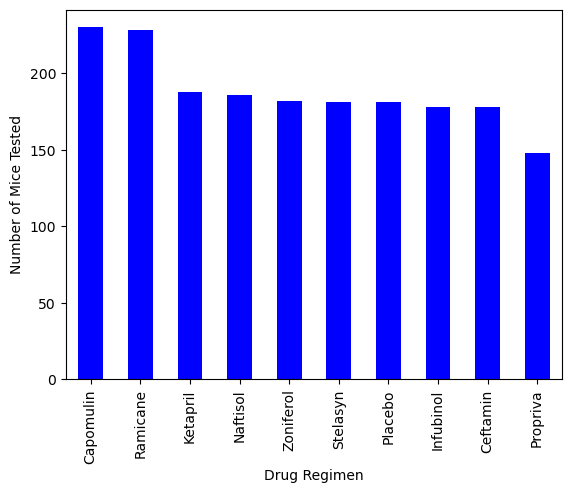

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_of_mice = cleaned_df["Drug Regimen"].value_counts(ascending = False)
number_of_mice

mice_plot = number_of_mice.plot(kind="bar", color = "b", align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

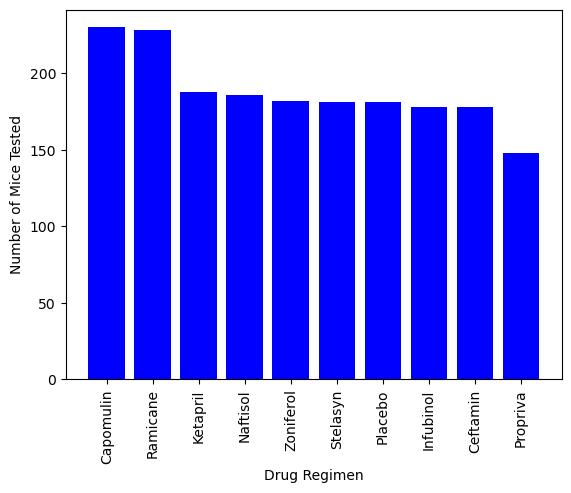

In [111]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x = number_of_mice.index.values
y = number_of_mice.values
mice_plot_plt = plt.bar(x, y, color = "b", align = "center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
tick_locations = [value for value in x]
plt.xticks(tick_locations, x)
plt.xticks(rotation = "vertical")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

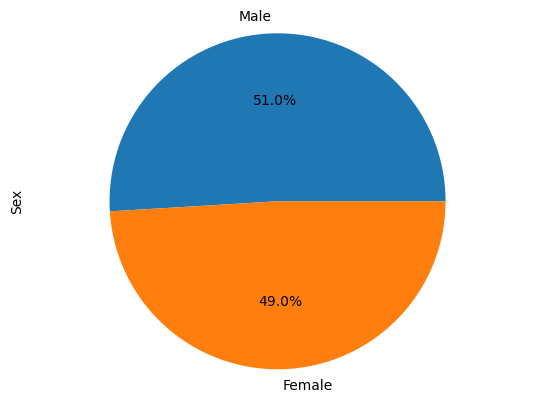

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female = cleaned_df["Sex"].value_counts()
male_female
male_female_plot = male_female.plot(kind = "pie", autopct = "%1.1f%%", startangle = 0)
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

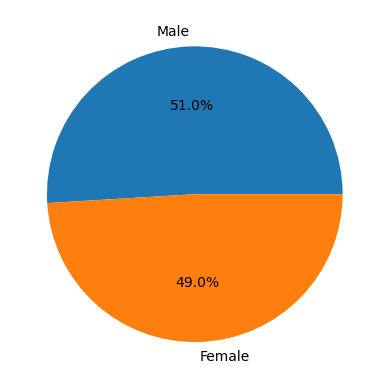

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = cleaned_df["Sex"].value_counts()
labels = ["Male", "Female"]
male_female
plt.pie(male_female, autopct = "%1.1f%%", startangle = 0, labels = labels)
plt.show

# Quartiles, Outliers and Boxplots

In [120]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] =="Capomulin"]
ramicane_data = cleaned_df[cleaned_df["Drug Regimen"] =="Ramicane"]
infubinol_data = cleaned_df[cleaned_df["Drug Regimen"] =="Infubinol"]
ceftamin_data = cleaned_df[cleaned_df["Drug Regimen"] =="Ceftamin"]

#combined_drugs = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
#all_drugs = pd.concat(combined_drugs)
#all_drugs

# Start by getting the last (greatest) timepoint for each mouse

all_drugs_group_by = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
#all_drugs_df = pd.DataFrame(all_drugs_group_by)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(all_drugs_group_by, cleaned_df, on=(["Mouse ID","Timepoint"]))
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [115]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumvol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    drug = merged_df.loc[merged_df["Drug Regimen"] ==treatment]
    tumor_vol = drug["Tumor Volume (mm3)"]
    tumvol_list.append(tumor_vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    q_25 = quartiles[0.25]
    q_75 = quartiles[0.75]
    iqr = q_75 - q_25
    
    
    
    
    
    # Determine outliers using upper and lower bounds
    upper_bound = q_75 + (1.5*iqr)
    lower_bound = q_25 - (1.5*iqr)
    outliers = tumor_vol[(tumor_vol > upper_bound) | (tumor_vol < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
       
    
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

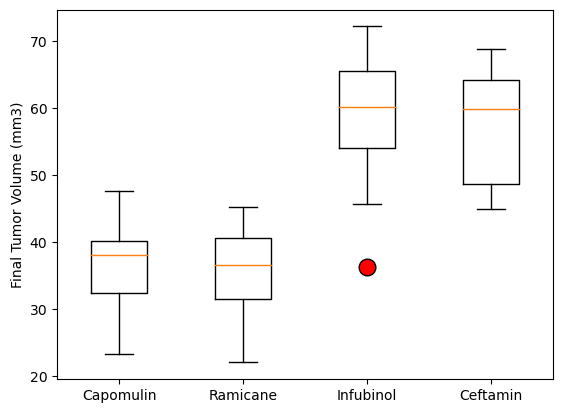

In [116]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
plt.boxplot(tumvol_list, labels = treatments, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

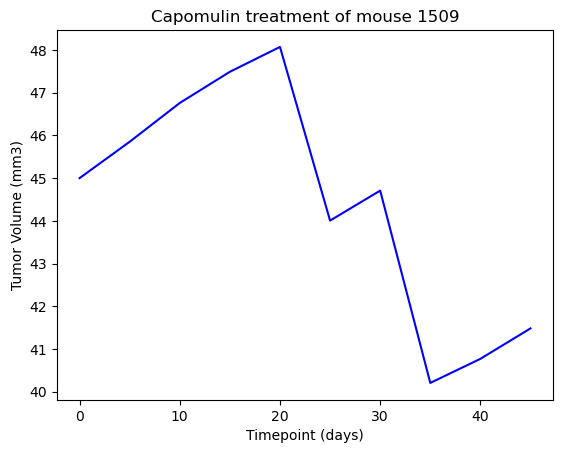

PearsonRResult(statistic=-0.7365750236367969, pvalue=0.015111062269100863)

In [130]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineplot_df = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
lineplot_df.head()
x = lineplot_df["Timepoint"]
y = lineplot_df["Tumor Volume (mm3)"]
plt.plot(x, y, color = "b")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
correlation = st.pearsonr(x,y)
plt.show()
correlation

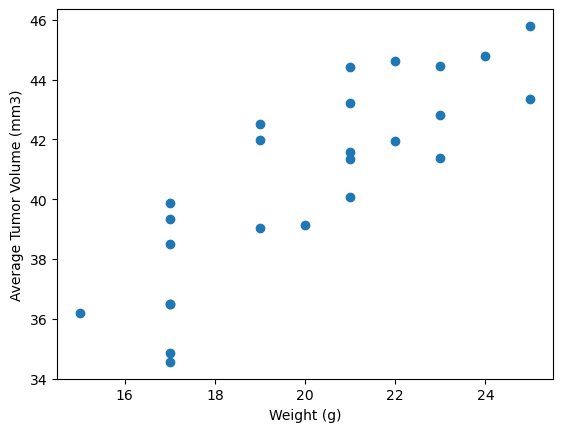

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_vol = capomulin_data.groupby(["Mouse ID"]).mean()
average_vol.head()

x_axis = average_vol["Weight (g)"]
y_axis = average_vol["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


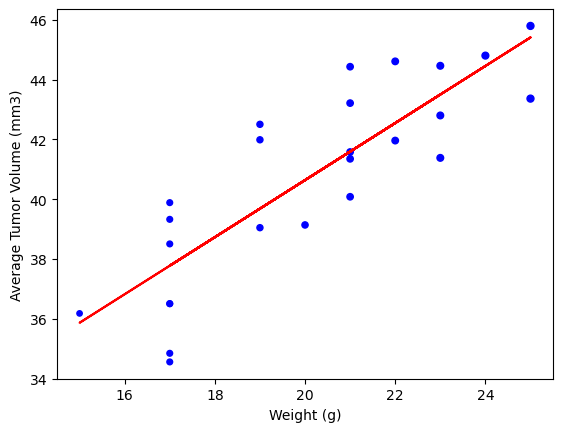

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
average_vol = capomulin_data.groupby(["Mouse ID"]).mean()

x_axis = average_vol["Weight (g)"]
y_axis = average_vol["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, s = x_axis, color = "b")
plt.plot(x_axis,regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
plt.show()

